# Decision Boundaries for Gaussian Classifiers

- The probability density function of a $D$-dimensional feature $\mathbf{x}$ from class $g \in G$, is notated $f_{\mathbf{X}|G}(\mathbf{x}|g)$.
- If we assume the feature is distributed multivariate Guassian:

$$f_{\mathbf{X}|G}(\mathbf{x}|g) = \frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}_g|} 
\exp\left [-(\mathbf{x}-\boldsymbol{\mu}_g)^T\mathbf{\Sigma}_g^{-1}(\mathbf{x}-\boldsymbol{\mu}_g)\right ]$$

- If $D=1$ this looks more familiar:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{g}^2}} \exp\left [-(x-\mu_{g})^2/2\sigma_{g}^2\right ]$$

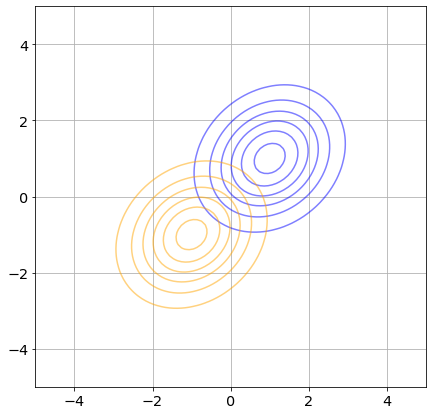

In [1]:
import numpy as np
import scipy.stats

param_mean1 = [1, 1]
param_mean2 = [-1, -1]
param_cov = [[1, 0.2], [0.2, 1]]

m, n = 100, 100
lims = (-5, 5) # support of the PDF
xx, yy = np.meshgrid(np.linspace(*lims, m), np.linspace(*lims, n))
points = np.stack((xx, yy), axis=-1)
pdf1 = scipy.stats.multivariate_normal.pdf(points, param_mean1, param_cov)
pdf2 = scipy.stats.multivariate_normal.pdf(points, param_mean2, param_cov)

import matplotlib.pyplot as plt

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (7, 7),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, pdf1, colors='blue', alpha=0.5)
ax.contour(xx, yy, pdf2, colors='orange', alpha=0.5)
plt.xlim((-5, 5)); plt.ylim((-5, 5))
plt.grid(); plt.show()

# Sampling from probability distributions

Having class-dependent probability density functions gives us a way to sample points.

$$f_{\mathbf{X}|G}(\mathbf{x}|g) = \frac{1}{(2\pi)^{D/2} |\mathbf{\Sigma}_g|} 
\exp\left [-(\mathbf{x}-\boldsymbol{\mu}_g)^T\mathbf{\Sigma}_g^{-1}(\mathbf{x}-\boldsymbol{\mu}_g)\right ]$$

We just have to define the parameters $(\boldsymbol{\mu},\mathbf{\Sigma})_g$ for each class.

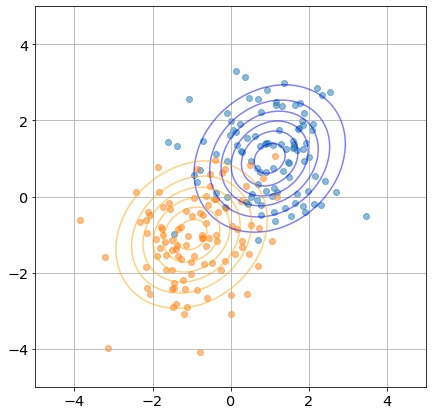

In [2]:
numvecs = 100

X1 = np.random.multivariate_normal(param_mean1,param_cov,numvecs)
X2 = np.random.multivariate_normal(param_mean2,param_cov,numvecs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, pdf1, colors='blue', alpha=0.5)
ax.contour(xx, yy, pdf2, colors='orange', alpha=0.5)
ax.scatter(X1[:,0],X1[:,1],alpha=0.5)
ax.scatter(X2[:,0],X2[:,1],alpha=0.5)
plt.xlim((-5, 5)); plt.ylim((-5, 5))
plt.grid(); plt.show()

# Classification 

We want to infer the best label $g \in G$ of an observation $\mathbf{x}$.
*Maximum a posteriori* (MAP) classificiton does this by:

$$g^* = \arg \max_{g\in G} P[g|\mathbf{x}]$$

By Bayes' Theorem, we can express this as:

$$g^* = \arg \max_{g\in G} f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]$$

What does the decision boundary look like for $D=2$ two classes?

# Classification: Case 1

$$g^* = \arg \max_{g\in G} f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]$$

- $P[G=g] = 0.5$
- $\boldsymbol{\mu}_g$ unique to each class
- $\mathbf{\Sigma}_g = \mathbf{\Sigma}$

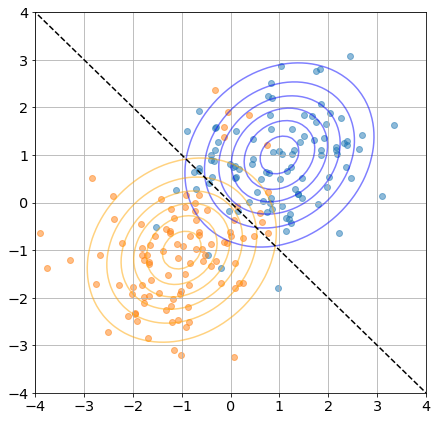

In [3]:
param_mean1 = [1, 1]
param_mean2 = [-1, -1]

param_cov = [[1, 0.2], [0.2, 1]]

prior1 = 0.5
prior2 = 1.0 - prior1

numvecs = 100
X1 = np.random.multivariate_normal(param_mean1,param_cov,numvecs)
X2 = np.random.multivariate_normal(param_mean2,param_cov,numvecs)

m, n = 100, 100
lims = (-5, 5) # support of the PDF
xx, yy = np.meshgrid(np.linspace(*lims, m), np.linspace(*lims, n))
points = np.stack((xx, yy), axis=-1)
pdf1 = scipy.stats.multivariate_normal.pdf(points, param_mean1, param_cov)
pdf2 = scipy.stats.multivariate_normal.pdf(points, param_mean2, param_cov)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, pdf1, colors='blue', alpha=0.5)
ax.contour(xx, yy, pdf2, colors='orange', alpha=0.5)
ax.contour(xx, yy, prior2*pdf2-prior1*pdf1, levels=[0],colors='black',linestyles='dashed')
ax.scatter(X1[:,0],X1[:,1],alpha=0.5)
ax.scatter(X2[:,0],X2[:,1],alpha=0.5)
plt.xlim((-4, 4)); plt.ylim((-4, 4))
ax.grid(); plt.show()


# Classification: Case 2 

$$g^* = \arg \max_{g\in G} f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]$$

- $P[G=g] = 0.5$
- $\boldsymbol{\mu}_g$ unique to each class
- $\mathbf{\Sigma}_g$ unique to each clas

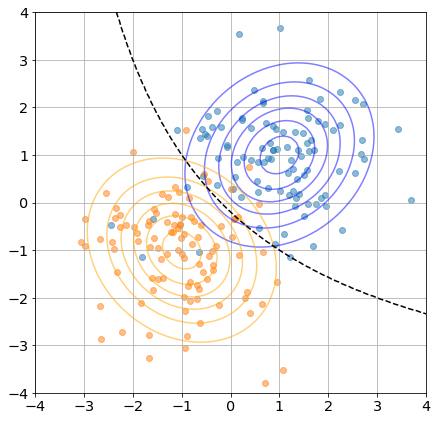

In [4]:
param_mean1 = [1, 1]; param_mean2 = [-1, -1]
#param_mean1 = [1, 1]; param_mean2 = [1, 1]

param_cov1 = [[1, 0.2], [0.2, 1]]; param_cov2 = [[1, -0.2], [-0.2, 1]]
#param_cov1 = [[2, 0.2], [0.2, 1]]; param_cov2 = [[1, -0.2], [-0.2, 1]]

numvecs = 100

X1 = np.random.multivariate_normal(param_mean1,param_cov1,numvecs)
X2 = np.random.multivariate_normal(param_mean2,param_cov2,numvecs)

prior1 = 0.5
prior2 = 1.0 - prior1
m, n = 100, 100
lims = (-5, 5) # support of the PDF
xx, yy = np.meshgrid(np.linspace(*lims, m), np.linspace(*lims, n))
points = np.stack((xx, yy), axis=-1)
pdf1 = scipy.stats.multivariate_normal.pdf(points, param_mean1, param_cov1)
pdf2 = scipy.stats.multivariate_normal.pdf(points, param_mean2, param_cov2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, pdf1, colors='blue', alpha=0.5)
ax.contour(xx, yy, pdf2, colors='orange', alpha=0.5)
ax.contour(xx, yy, prior2*pdf2-prior1*pdf1, levels=[0],colors='black',linestyles='dashed')
ax.scatter(X1[:,0],X1[:,1],alpha=0.5)
ax.scatter(X2[:,0],X2[:,1],alpha=0.5)
plt.xlim((-4, 4)); plt.ylim((-4, 4))
ax.grid(); plt.show()


# Classification: Case 3

$$g^* = \arg \max_{g\in G} f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]$$

- $P[G=g] = 0.5$
- $\boldsymbol{\mu}_g$ same for each class
- $\mathbf{\Sigma}_g$ unique to each clas

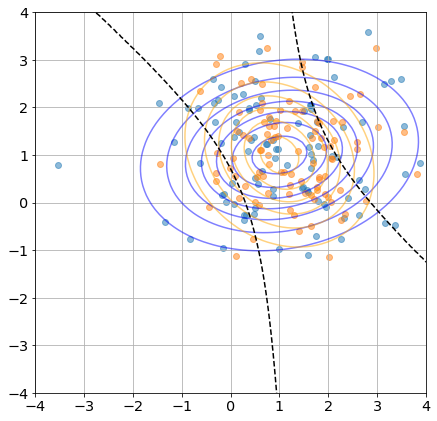

In [5]:
param_mean1 = [1, 1]; param_mean2 = [1, 1]

param_cov1 = [[2, 0.2], [0.2, 1]]; param_cov2 = [[1, -0.2], [-0.2, 1]]

numvecs = 100

X1 = np.random.multivariate_normal(param_mean1,param_cov1,numvecs)
X2 = np.random.multivariate_normal(param_mean2,param_cov2,numvecs)

prior1 = 0.5
prior2 = 1.0 - prior1
m, n = 100, 100
lims = (-5, 5) # support of the PDF
xx, yy = np.meshgrid(np.linspace(*lims, m), np.linspace(*lims, n))
points = np.stack((xx, yy), axis=-1)
pdf1 = scipy.stats.multivariate_normal.pdf(points, param_mean1, param_cov1)
pdf2 = scipy.stats.multivariate_normal.pdf(points, param_mean2, param_cov2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, pdf1, colors='blue', alpha=0.5)
ax.contour(xx, yy, pdf2, colors='orange', alpha=0.5)
ax.contour(xx, yy, prior2*pdf2-prior1*pdf1, levels=[0],colors='black',linestyles='dashed')
ax.scatter(X1[:,0],X1[:,1],alpha=0.5)
ax.scatter(X2[:,0],X2[:,1],alpha=0.5)
plt.xlim((-4, 4)); plt.ylim((-4, 4))
ax.grid(); plt.show()


# Classification: Case 4

$$g^* = \arg \max_{g\in G} f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]$$

- $P[G=g] = 0.5$
- $\boldsymbol{\mu}_g$ same for each class
- $\mathbf{\Sigma}_g$ similar to each class

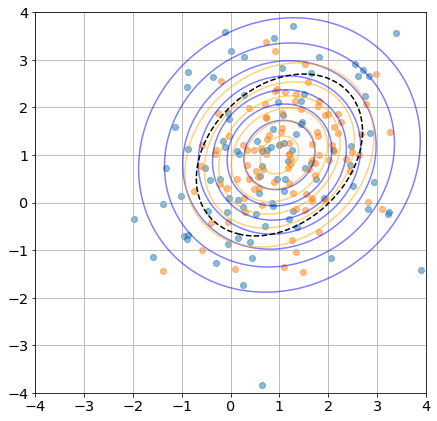

In [6]:
import numpy as np # because we need random number generation

param_mean1 = [1, 1]; param_mean2 = [1, 1]

param_cov1 = [[2, 0.2], [0.2, 2]]; param_cov2 = [[1, 0.2], [0.2, 1]]

X1 = np.random.multivariate_normal(param_mean1,param_cov1,numvecs)
X2 = np.random.multivariate_normal(param_mean2,param_cov2,numvecs)

# evaluate each pdf at a given x, y
import scipy.stats

prior1 = 0.5
prior2 = 1.0 - prior1
m, n = 100, 100
lims = (-5, 5) # support of the PDF
xx, yy = np.meshgrid(np.linspace(*lims, m), np.linspace(*lims, n))
points = np.stack((xx, yy), axis=-1)
pdf1 = scipy.stats.multivariate_normal.pdf(points, param_mean1, param_cov1)
pdf2 = scipy.stats.multivariate_normal.pdf(points, param_mean2, param_cov2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, pdf1, colors='blue', alpha=0.5)
ax.contour(xx, yy, pdf2, colors='orange', alpha=0.5)
ax.contour(xx, yy, prior2*pdf2-prior1*pdf1, levels=[0],colors='black',linestyles='dashed')
ax.scatter(X1[:,0],X1[:,1],alpha=0.5)
ax.scatter(X2[:,0],X2[:,1],alpha=0.5)
plt.xlim((-4, 4))
plt.ylim((-4, 4))
ax.grid()
plt.show()
